<a href="https://colab.research.google.com/github/Blackcipher101/ASL-detector/blob/main/ASLdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"nehalnevle","key":"f56fbefc794d7437f2952910cd1d058d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43           4616  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08           1158  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           5143  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           3108  
balraj98/stanford-back

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:10<00:00, 177MB/s]
100% 1.03G/1.03G [00:10<00:00, 109MB/s]


In [ ]:
!unzip '/content/datasets/grassknoted/asl-alphabet/*.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [ ]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
base_dir = '/content/asl_alphabet_train/asl_alphabet_train'
classes = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  print(img_path)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

/content/asl_alphabet_train/asl_alphabet_train/A
A: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/B
B: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/C
C: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/D
D: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/E
E: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/F
F: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/G
G: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/H
H: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/I
I: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/J
J: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/K
K: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/L
L: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/M
M: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/N
N: 3000 Images
/content/asl_alphabet_train/asl_alphabet_train/O
O: 3000 Images
/content/asl_alphabet_train/asl_alphabet

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 100
IMG_SHAPE = 64

In [ ]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_SHAPE = 224

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255
                    )



train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                color_mode="grayscale",
                                                target_size=(128,128),
                                                class_mode='sparse'
                                                )

Found 62400 images belonging to 26 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.reshape(128,128))
    plt.tight_layout()
    plt.show()

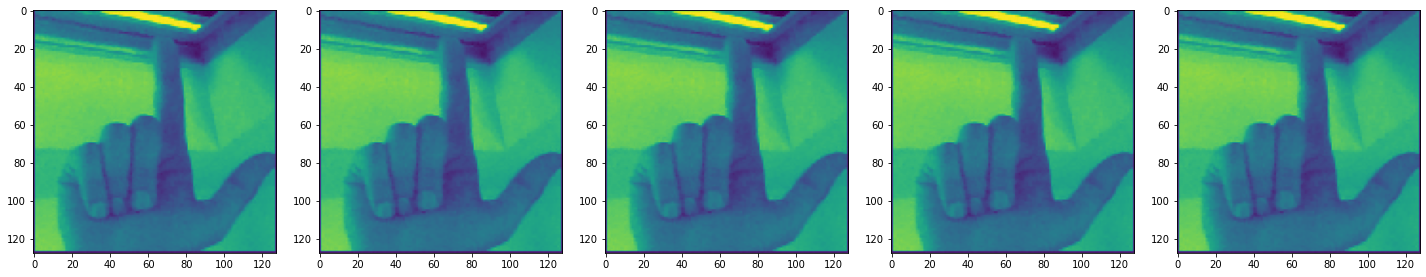

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 color_mode="grayscale",
                                                 target_size=(128,128),
                                                 class_mode='sparse')

Found 15600 images belonging to 26 classes.


In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(224, 224,3))

In [ ]:
feature_extractor.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, padding='same', activation='relu', input_shape=(128,128, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
 
    tf.keras.layers.Conv2D(64,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 100, 100, 124)     71548     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 50, 50, 124)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 124)       138508    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 25, 25, 124)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 25, 25, 124)      

In [ ]:
epochs = 15
 
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/15
547/624 [=========================>....] - ETA: 9s - loss: 3.0387 - accuracy: 0.2810

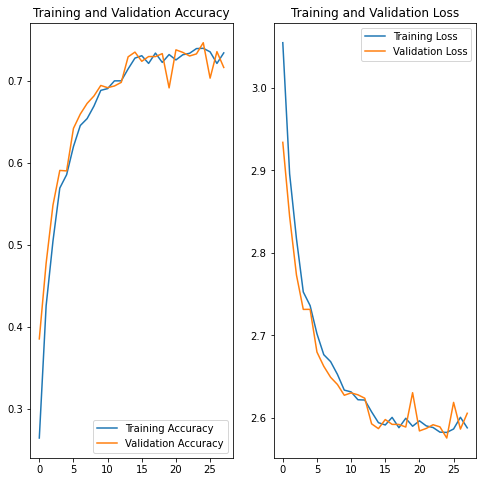

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o logo.png https://burst.shopifycdn.com/photos/the-letter-a-displayed-in-american-sign-language.jpg?width=4460&height=4460&exif=1&iptc=1&attachment=the-letter-a-displayed-in-american-sign-language.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  403k  100  403k    0     0   134k      0  0:00:02  0:00:02 --:--:--  134k


(1, 200, 200, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
11
L


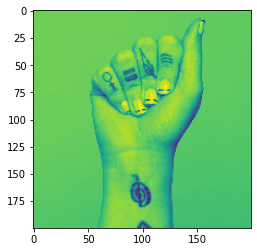

In [ ]:
import numpy as np
import cv2
import time
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x=800
y=1700
w=1300
h=1300
img=img[x:x+w,y:y+h]
im=cv2.resize(img,(200,200))



plt.imshow(im)
batch = np.expand_dims(im,axis=0)
batch = np.expand_dims(batch,axis=3)
print(batch.shape) 





test=model.predict(batch)
print(test)
predicted_ids=np.argmax(test)
print(predicted_ids)
if predicted_ids==[0]:
  print('A')
elif predicted_ids==[1]:
  print('B')
elif predicted_ids==[2]:
  print('C')
elif predicted_ids==[3]:
  print('D')
elif predicted_ids==[4]:
  print('E')
elif predicted_ids==[5]:
  print('F')
elif predicted_ids==[6]:
  print('G')
elif predicted_ids==[7]:
  print('H')
elif predicted_ids==[8]:
  print('I')
elif predicted_ids==[9]:
  print('J')
elif predicted_ids==[10]:
  print('K')
elif predicted_ids==[11]:
  print('L')
elif predicted_ids==[12]:
  print('M')
elif predicted_ids==[13]:
  print('N')
elif predicted_ids==[14]:
  print('O')
elif predicted_ids==[15]:
  print('P')
elif predicted_ids==[16]:
  print('Q')
elif predicted_ids==[17]:
  print('R')
elif predicted_ids==[18]:
  print('S')
elif predicted_ids==[19]:
  print('T')
elif predicted_ids==[20]:
  print('U')￼

elif predicted_ids==[21]:
  print('V')
elif predicted_ids==[22]:
  print('W')
elif predicted_ids==[23]:
  print('X')
elif predicted_ids==[24]:
  print('Y')
elif predicted_ids==[25]:
  print('Z')


In [ ]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1602237499.h5


In [ ]:
!ls

1602237499.h5	   asl_alphabet_train  logo.png
asl_alphabet_test  datasets	       sample_data


In [ ]:
!zip -r model.zip {export_path_sm}

  adding: 1602146320/ (stored 0%)
  adding: 1602146320/assets/ (stored 0%)
  adding: 1602146320/saved_model.pb (deflated 89%)
  adding: 1602146320/variables/ (stored 0%)
  adding: 1602146320/variables/variables.index (deflated 65%)
  adding: 1602146320/variables/variables.data-00000-of-00001 (deflated 24%)


In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>